## Redes Neuronales Preentrenadas

https://keras.io/api/applications/

Para este ejemplo vamos a usar la arquitectura de un modelo **VGG16**.

### Padding

**Padding** (relleno) es el proceso de agregar capas de ceros a nuestras imágenes de entrada para evitar que el tamaño de la imagen reduzca mucho de tamaño cuando pasa por una capa convolucional.

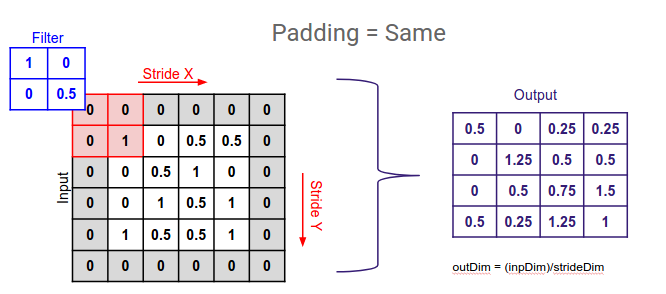

En la imagen anterior, vemos que se aplica una capa convolucional, que por lo general deberia reducir el tamaño de la imagen, pero agregando una capa de 0 alrededor de la imagen vemos que no se modifica el tamaño.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import keras

# dataset
from tensorflow.keras.datasets.cifar10 import load_data

from tensorflow.keras import Sequential

from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout

from tensorflow.keras.utils import to_categorical

from sklearn.metrics import confusion_matrix

170498071/170498071 [==============================] - 9s 0us/step


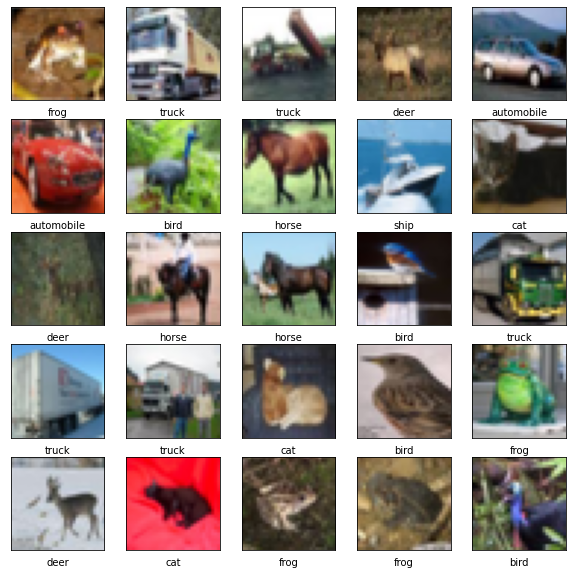

In [2]:
(X_train, y_train), (X_test, y_test) = load_data()

X_train, X_test = X_train/255.0, X_test/255.0

class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

plt.figure(figsize = (10, 10))

for i in range(25):
    
    plt.subplot(5, 5, i + 1)
    plt.xticks(list())
    plt.yticks(list())
    plt.grid(False)
    plt.imshow(X_train[i], cmap = plt.cm.binary)

    plt.xlabel(class_names[y_train[i][0]])
    
plt.show()

In [3]:
print(X_train.shape)

(50000, 32, 32, 3)


In [4]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [5]:
# Reducimos el tamaño de los datos

X_train, y_train = X_train[:1_000], y_train[:1_000]

In [6]:
X_train.shape

(1000, 32, 32, 3)

_**Documentacion:** https://keras.io/api/applications/vgg/_

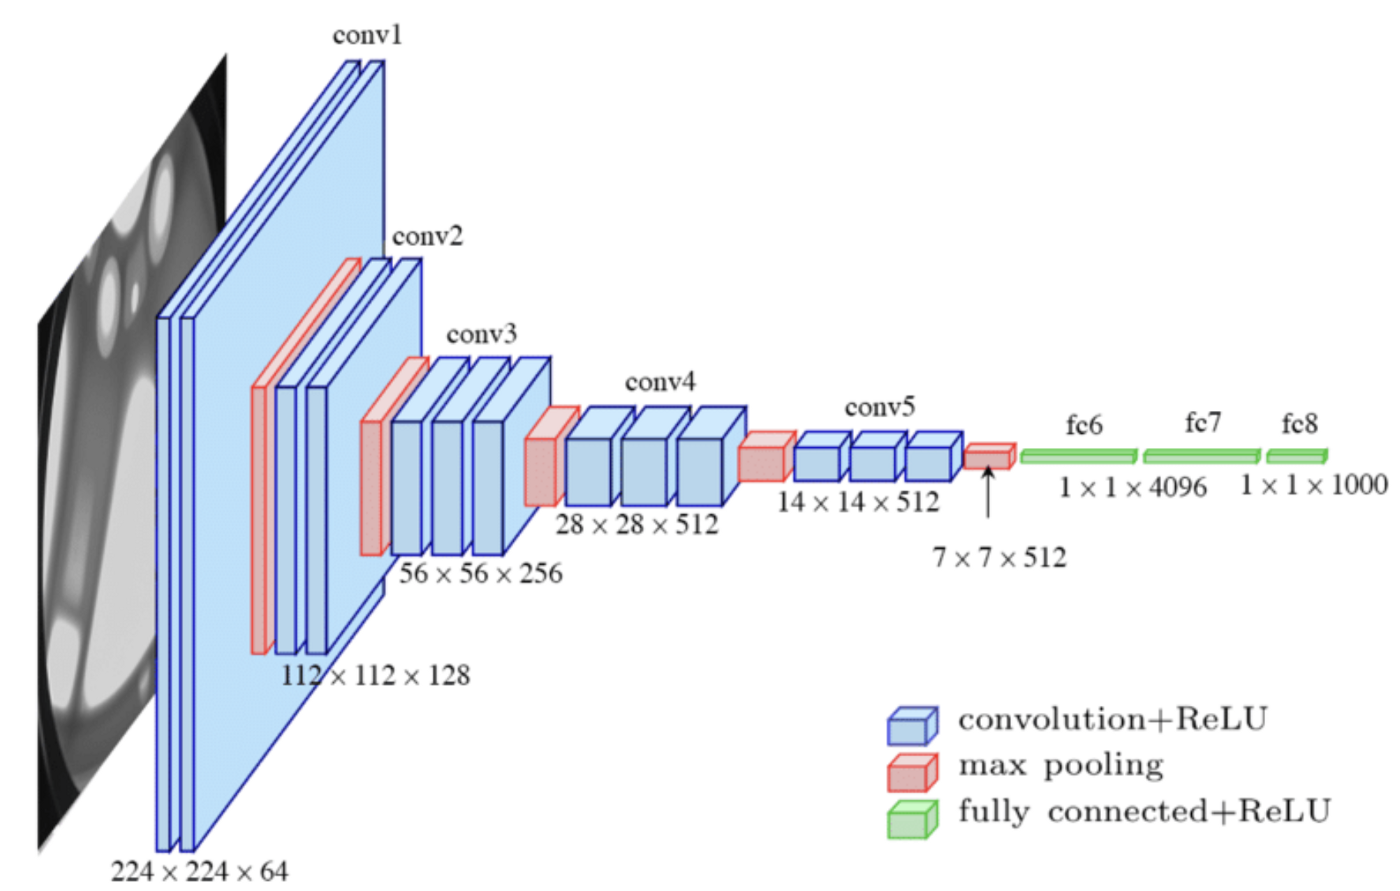

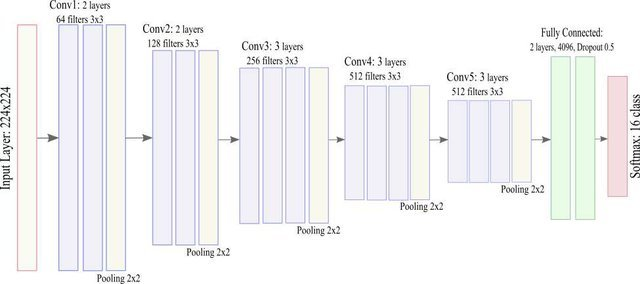

In [7]:
# Modelo VGG16

input_shape = (32, 32, 3)

model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (3, 3), input_shape = input_shape, activation = "relu", padding = "same"))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = "relu", padding = "same"))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = "relu", padding = "same"))
model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = "relu", padding = "same"))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

model.add(Conv2D(filters = 256, kernel_size = (3, 3), activation = "relu", padding = "same"))
model.add(Conv2D(filters = 256, kernel_size = (3, 3), activation = "relu", padding = "same"))
model.add(Conv2D(filters = 256, kernel_size = (3, 3), activation = "relu", padding = "same"))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

model.add(Conv2D(filters = 512, kernel_size = (3, 3), activation = "relu", padding = "same"))
model.add(Conv2D(filters = 512, kernel_size = (3, 3), activation = "relu", padding = "same"))
model.add(Conv2D(filters = 512, kernel_size = (3, 3), activation = "relu", padding = "same"))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

model.add(Conv2D(filters = 512, kernel_size = (3, 3), activation = "relu", padding = "same"))
model.add(Conv2D(filters = 512, kernel_size = (3, 3), activation = "relu", padding = "same"))
model.add(Conv2D(filters = 512, kernel_size = (3, 3), activation = "relu", padding = "same"))
model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2)))

model.add(Flatten())
model.add(Dense(units = 4096, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(units = 4096, activation = "relu"))
model.add(Dropout(0.5))

model.add(Dense(units = 10, activation = "softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                    

In [8]:
from tensorflow.keras.applications import VGG16

model = VGG16(weights = "imagenet", include_top = False, input_shape = (32, 32, 3))

model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [9]:
model.compile(optimizer = "adam",
              loss      = "sparse_categorical_crossentropy",
              metrics   = ["accuracy"])

history = model.fit(x = X_train, y = y_train,
                    validation_data = (X_test, y_test), epochs = 10)

Epoch 1/10
32/32 [==============================] - 52s 2s/step - loss: 11.9353 - accuracy: 0.0885 - val_loss: 11.4626 - val_accuracy: 0.1000
Epoch 2/10
32/32 [==============================] - 51s 2s/step - loss: 11.4787 - accuracy: 0.0988 - val_loss: 11.4626 - val_accuracy: 0.1000
Epoch 3/10
32/32 [==============================] - 49s 2s/step - loss: 11.4787 - accuracy: 0.0988 - val_loss: 11.4626 - val_accuracy: 0.1000
Epoch 4/10
32/32 [==============================] - 51s 2s/step - loss: 11.4787 - accuracy: 0.0996 - val_loss: 11.4626 - val_accuracy: 0.1000
Epoch 5/10
32/32 [==============================] - 49s 2s/step - loss: 11.4787 - accuracy: 0.0996 - val_loss: 11.4626 - val_accuracy: 0.1000
Epoch 6/10
32/32 [==============================] - 50s 2s/step - loss: 11.4787 - accuracy: 0.0988 - val_loss: 11.4626 - val_accuracy: 0.1000
Epoch 7/10
32/32 [==============================] - 52s 2s/step - loss: 11.4787 - accuracy: 0.0988 - val_loss: 11.4626 - val_accuracy: 0.1000
Epoch 

In [10]:
history.history

{'loss': [11.935332298278809,
  11.478742599487305,
  11.478742599487305,
  11.478740692138672,
  11.478742599487305,
  11.478741645812988,
  11.478742599487305,
  11.478741645812988,
  11.478740692138672,
  11.478742599487305],
 'accuracy': [0.08853118866682053,
  0.0988430604338646,
  0.0988430604338646,
  0.09959758818149567,
  0.09959758818149567,
  0.0988430604338646,
  0.0988430604338646,
  0.0988430604338646,
  0.09959758818149567,
  0.09959758818149567],
 'val_loss': [11.462626457214355,
  11.462626457214355,
  11.462626457214355,
  11.462626457214355,
  11.462626457214355,
  11.462626457214355,
  11.462626457214355,
  11.462626457214355,
  11.462626457214355,
  11.462626457214355],
 'val_accuracy': [0.10003002732992172,
  0.10003002732992172,
  0.10003002732992172,
  0.10003002732992172,
  0.10003002732992172,
  0.10003002732992172,
  0.10003002732992172,
  0.10003002732992172,
  0.10003002732992172,
  0.10003002732992172]}

In [11]:
def plot_history(history):
    
    accuracy     = history.history["accuracy"]
    loss         = history.history["loss"]

    val_accuracy = history.history["val_accuracy"]
    val_loss     = history.history["val_loss"]

    epochs = range(1, len(accuracy) + 1)

    # Plot Accuracy
    plt.plot(epochs,     accuracy, "r--", label = "Train accuracy"  )
    plt.plot(epochs, val_accuracy,  "b", label = "Validation accuracy")
    
    plt.title("Training and validation accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()
    plt.show()

    # Plot Loss
    plt.plot(epochs, loss, "r--", label = "Train loss" )
    plt.plot(epochs, val_loss ,  "b", label = "Validation loss" )
    
    plt.title("Training and validation loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")
    plt.legend()

    plt.show()

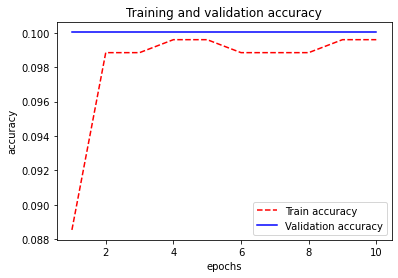

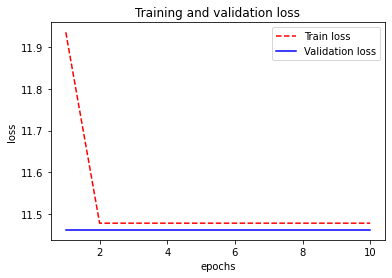

313/313 - 24s - loss: 11.4626 - accuracy: 0.1000 - 24s/epoch - 76ms/step
Test Accuracy: 0.10003002732992172


In [12]:
plot_history(history)

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose = 2)
print ("Test Accuracy:", test_accuracy)

In [13]:
# También podemos tener un modelo preentrenado y agregarle más capas

model_vgg16 = VGG16(weights = "imagenet", include_top = False, input_shape = (32, 32, 3))

model = Sequential()

model.add(model_vgg16)

model.add(Flatten())

model.add(Dense(500, activation = "sigmoid"))

model.add(Dropout(0.5))

model.add(Dense(200, activation = "sigmoid"))

model.add(Dense(10, activation = "softmax"))

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 500)               256500    
                                                                 
 dropout_2 (Dropout)         (None, 500)               0         
                                                                 
 dense_4 (Dense)             (None, 200)               100200    
                                                                 
 dense_5 (Dense)             (None, 10)                2010      
                                                                 
Total params: 15,073,398
Trainable params: 15,073,398


In [15]:
model.compile(optimizer = "adam",
              loss      = "sparse_categorical_crossentropy",
              metrics   = ["accuracy"])

history = model.fit(x = X_train, y = y_train,
                    validation_data = (X_test, y_test), epochs = 3)

Epoch 1/3
32/32 [==============================] - 52s 2s/step - loss: 2.3878 - accuracy: 0.0900 - val_loss: 2.3417 - val_accuracy: 0.1000
Epoch 2/3
32/32 [==============================] - 50s 2s/step - loss: 2.3418 - accuracy: 0.1010 - val_loss: 2.3256 - val_accuracy: 0.1000
Epoch 3/3
32/32 [==============================] - 50s 2s/step - loss: 2.3682 - accuracy: 0.0900 - val_loss: 2.3536 - val_accuracy: 0.1000


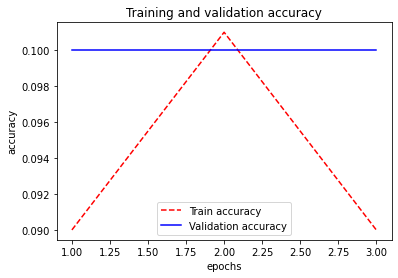

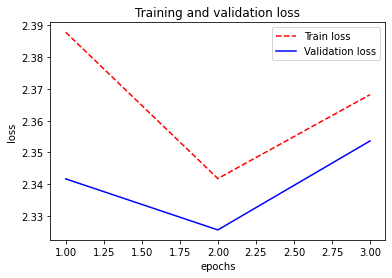

313/313 - 23s - loss: 2.3536 - accuracy: 0.1000 - 23s/epoch - 74ms/step
Test Accuracy: 0.10000000149011612


In [16]:
plot_history(history)

test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose = 2)
print ("Test Accuracy:", test_accuracy)

In [ ]:
################################################################################################################################